In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(torch.__version__)

2.2.1


In [4]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [5]:
scalar.dim() == scalar.ndim == scalar.ndimension()
scalar.item()

7

In [6]:
vector = torch.tensor([5,1])
vector.ndim

1

In [7]:
vector.shape

torch.Size([2])

In [8]:
MATRIX = torch.tensor([[1,2], [3,4]])
MATRIX.ndim

2

In [9]:
MATRIX.shape

torch.Size([2, 2])

In [10]:
TENSOR = torch.tensor([[[1,1,3], [2,2,3]]])
TENSOR.ndim

3

In [11]:
TENSOR.shape

torch.Size([1, 2, 3])

In [12]:
torch.rand(3,4)

tensor([[0.1809, 0.7278, 0.5799, 0.4132],
        [0.7993, 0.6162, 0.6212, 0.7099],
        [0.4793, 0.8523, 0.6585, 0.0811]])

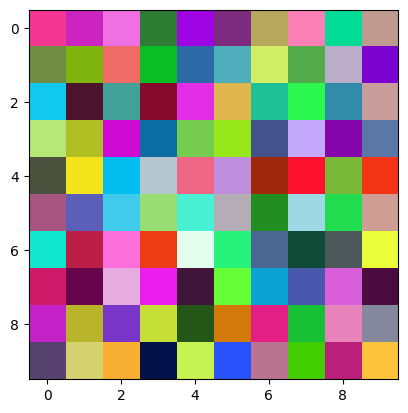

In [13]:
random_image = torch.rand(size=(10,10,3))
plt.imshow(random_image)

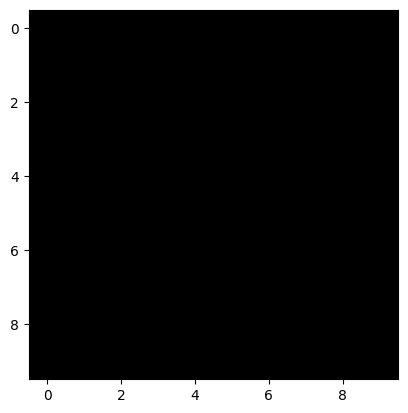

In [14]:
zeros = torch.zeros(size=random_image.size()) # can also do torch.ones
plt.imshow(random_image*zeros)

In [15]:
ten = torch.arange(0,10)
torch.zeros_like(ten)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
t = torch.tensor([1,2,3])
print(t + 10)
print(t * 10)
print(torch.div(t, 5)) # same as t / 5

tensor([11, 12, 13])
tensor([10, 20, 30])
tensor([0.2000, 0.4000, 0.6000])


In [70]:
%%time 
# time this cell
torch.matmul(torch.ones(4,3), t.type(torch.float32))
torch.ones(4,3) @ t.type(torch.float32) # also matrix mult

CPU times: user 1.11 ms, sys: 402 µs, total: 1.52 ms
Wall time: 1.14 ms


tensor([6., 6., 6., 6.])

In [80]:
torch.matmul(torch.ones(3,4).T, t.type(torch.float32)) # transpose

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [108]:
random_image.shape, random_image.min(2).values.shape, random_image.mean(), random_image.sum()

(torch.Size([10, 10, 3]),
 torch.Size([10, 10]),
 tensor(0.5192),
 tensor(155.7528))

In [117]:
random_image.mean(), random_image.argmin()

(tensor(0.5192), tensor(293))

In [121]:
tensor = torch.arange(10.)
tensor, tensor.shape

(tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([10]))

In [130]:
t_reshaped = tensor.reshape(1, 10)
t_reshaped = tensor.reshape(5, 2)
t_reshaped, t_reshaped.shape

(tensor([[0., 1.],
         [2., 3.],
         [4., 5.],
         [6., 7.],
         [8., 9.]]),
 torch.Size([5, 2]))

In [133]:
# view shares the same memory with the origina tensor
z = tensor.view(2,5)
z

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

In [134]:
tensor

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [143]:
torch.stack([tensor, tensor, tensor, tensor], dim=1)

tensor([[0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])

In [147]:
# 'squeeze' removes all dimentions of size 1, 'unsqueeze' creates a new dimention of size 1
print(tensor.shape)
t1 = tensor.reshape(1, 10)
print(t1.shape)
print(t1.squeeze().shape)
t2 = tensor.reshape(1, 10, 1)
print(t2.shape)
print(t2.squeeze().shape)

torch.Size([10])
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 10, 1])
torch.Size([10])


In [152]:
# 'permute'
print(random_image.shape)
print(random_image.permute([2,0,1]).shape)

torch.Size([10, 10, 3])
torch.Size([3, 10, 10])


In [163]:
tensor = torch.arange(9).reshape(1,3,3)
print(tensor)
print(tensor[0])
print(tensor[0, 1])
print(tensor[0][1])
print(tensor[0,1,1])
print(tensor[:,:,1]) # keeps the dim where ':' was used
print(tensor[0][:,1]) 
# error - print(tensor[:][:][1])

tensor([[[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]])
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([3, 4, 5])
tensor([3, 4, 5])
tensor(4)
tensor([[1, 4, 7]])
tensor([1, 4, 7])


In [170]:
# torch <--> numpy, this can change the data type
arr = tensor.numpy()
print(arr)
torch.from_numpy(arr)

[[[0 1 2]
  [3 4 5]
  [6 7 8]]]


tensor([[[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]])

In [174]:
torch.manual_seed(1)
a = torch.rand(2,2)
b = torch.rand(2,2)
a == b

tensor([[False, False],
        [False, False]])

In [179]:
torch.manual_seed(1)
c = torch.rand(2,2)
d = torch.rand(2,2)
(c == a) 

tensor([[True, True],
        [True, True]])

In [180]:
(b==d)

tensor([[True, True],
        [True, True]])

In [181]:
torch.cuda.is_available()

False

In [186]:
b = a.to('cpu') # == a.cpu()

In [187]:
print(a)
a += 1
print(a)
print(b)

tensor([[1.7576, 1.2793],
        [1.4031, 1.7347]])
tensor([[2.7576, 2.2793],
        [2.4031, 2.7347]])
tensor([[2.7576, 2.2793],
        [2.4031, 2.7347]])
